In [1]:
import keras

Using TensorFlow backend.


In [3]:
#SimpleRNN例子 返回最后一个时间的输出,形状为(batch_size,output_features)
from keras .models import Sequential
from keras.layers import Embedding,SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
#返回完整的状态序列,形状为(batch_size,timestep,output_features)
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
#为提高网络表达能力，将多个循环层逐个堆叠有时也是有用的，需要让所有中间层返回完整的输出序列
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))       #最后一层仅返回最终输出
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


将此模型应用于IMDB电影评论分类问题

In [7]:
#准备IMDB数据
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000   #作为特征的单词个数
maxlen = 500           #在maxlen个单词后截断文本
batch_size = 32
print('loading data...')
(input_train,y_train), (input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train),'train_sequence')
print(len(input_test),'test_sequence')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

loading data...
25000 train_sequence
25000 test_sequence
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [8]:
#用Embedding层和SimpleRNN层训练模型
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6244 - acc: 0.6363 - val_loss: 0.4469 - val_acc: 0.8024
Epoch 2/10
20000/20000 [==============================] - 19s 966us/step - loss: 0.3792 - acc: 0.8421 - val_loss: 0.4320 - val_acc: 0.8028
Epoch 3/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2848 - acc: 0.8853 - val_loss: 0.4369 - val_acc: 0.8034
Epoch 4/10
20000/20000 [==============================] - 20s 995us/step - loss: 0.2281 - acc: 0.9126 - val_loss: 0.3476 - val_acc: 0.8674
Epoch 5/10
20000/20000 [==============================] - 20s 992us/step - loss: 0.1638 - acc: 0.9420 - val_loss: 0.4382 - val_acc: 0.8468
Epoch 6/10
20000/20000 [==============================] - 20s 996us/step - loss: 0.1127 - acc: 0.9618 - val_loss: 0.4549 - val_acc: 0.8234
Epoch 7/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.0713 - acc: 0.9782 - val_loss: 0.4789 - 

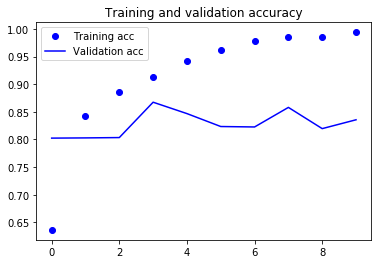

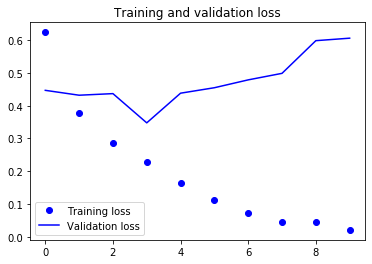

In [10]:
#绘制结果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Keras中一个LSTM的具体例子

In [11]:
#使用Keras中的LSTM层
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5310 - acc: 0.7448 - val_loss: 0.3801 - val_acc: 0.8390
Epoch 2/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.3059 - acc: 0.8820 - val_loss: 0.3490 - val_acc: 0.8580
Epoch 3/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.2378 - acc: 0.9105 - val_loss: 0.4005 - val_acc: 0.8706
Epoch 4/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.2074 - acc: 0.9254 - val_loss: 0.3279 - val_acc: 0.8584
Epoch 5/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1829 - acc: 0.9358 - val_loss: 0.3261 - val_acc: 0.8680
Epoch 6/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.1621 - acc: 0.9421 - val_loss: 0.4085 - val_acc: 0.8520
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1479 - acc: 0.9486 - val_loss: 0.3737 - val_acc:

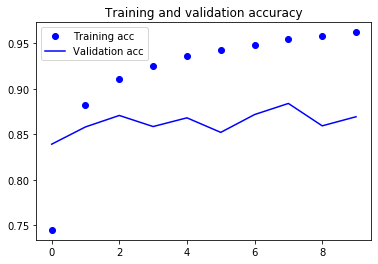

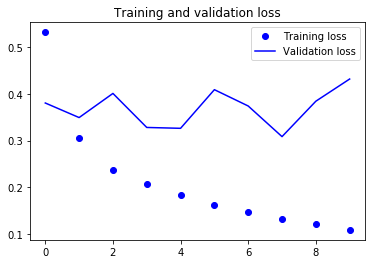

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()